<a href="https://colab.research.google.com/github/akbdas-git-hub/ai-ml/blob/main/NeuralNetProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! ls /content/drive/MyDrive/'Colab Notebooks'/pywork

Automobile.csv				  Dataset-Signal.csv
Autonomous_Vehicles_SVHN_single_grey1.h5  Python_for_Visualization_and_EDA.ipynb


In [3]:
import pandas as pd
import numpy as np
!pip install scikeras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/pywork/Dataset-Signal.csv')

In [5]:
df.shape

(1599, 12)

In [6]:

df.isnull().values.any()

False

In [7]:
print(df.isna().any(axis=None))

False


In [8]:
df.isna().sum()

,0
Parameter 1,0
Parameter 2,0
Parameter 3,0
Parameter 4,0
Parameter 5,0
Parameter 6,0
Parameter 7,0
Parameter 8,0
Parameter 9,0
Parameter 10,0


In [9]:
df.columns

Index(['Parameter 1', 'Parameter 2', 'Parameter 3', 'Parameter 4',
       'Parameter 5', 'Parameter 6', 'Parameter 7', 'Parameter 8',
       'Parameter 9', 'Parameter 10', 'Parameter 11', 'Signal_Strength'],
      dtype='object')

In [10]:


print(df.duplicated().any())


True


In [11]:
df1 = df.drop_duplicates()

In [12]:
df1.shape

(1359, 12)

In [13]:
df1.isna().sum()

,0
Parameter 1,0
Parameter 2,0
Parameter 3,0
Parameter 4,0
Parameter 5,0
Parameter 6,0
Parameter 7,0
Parameter 8,0
Parameter 9,0
Parameter 10,0


In [14]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

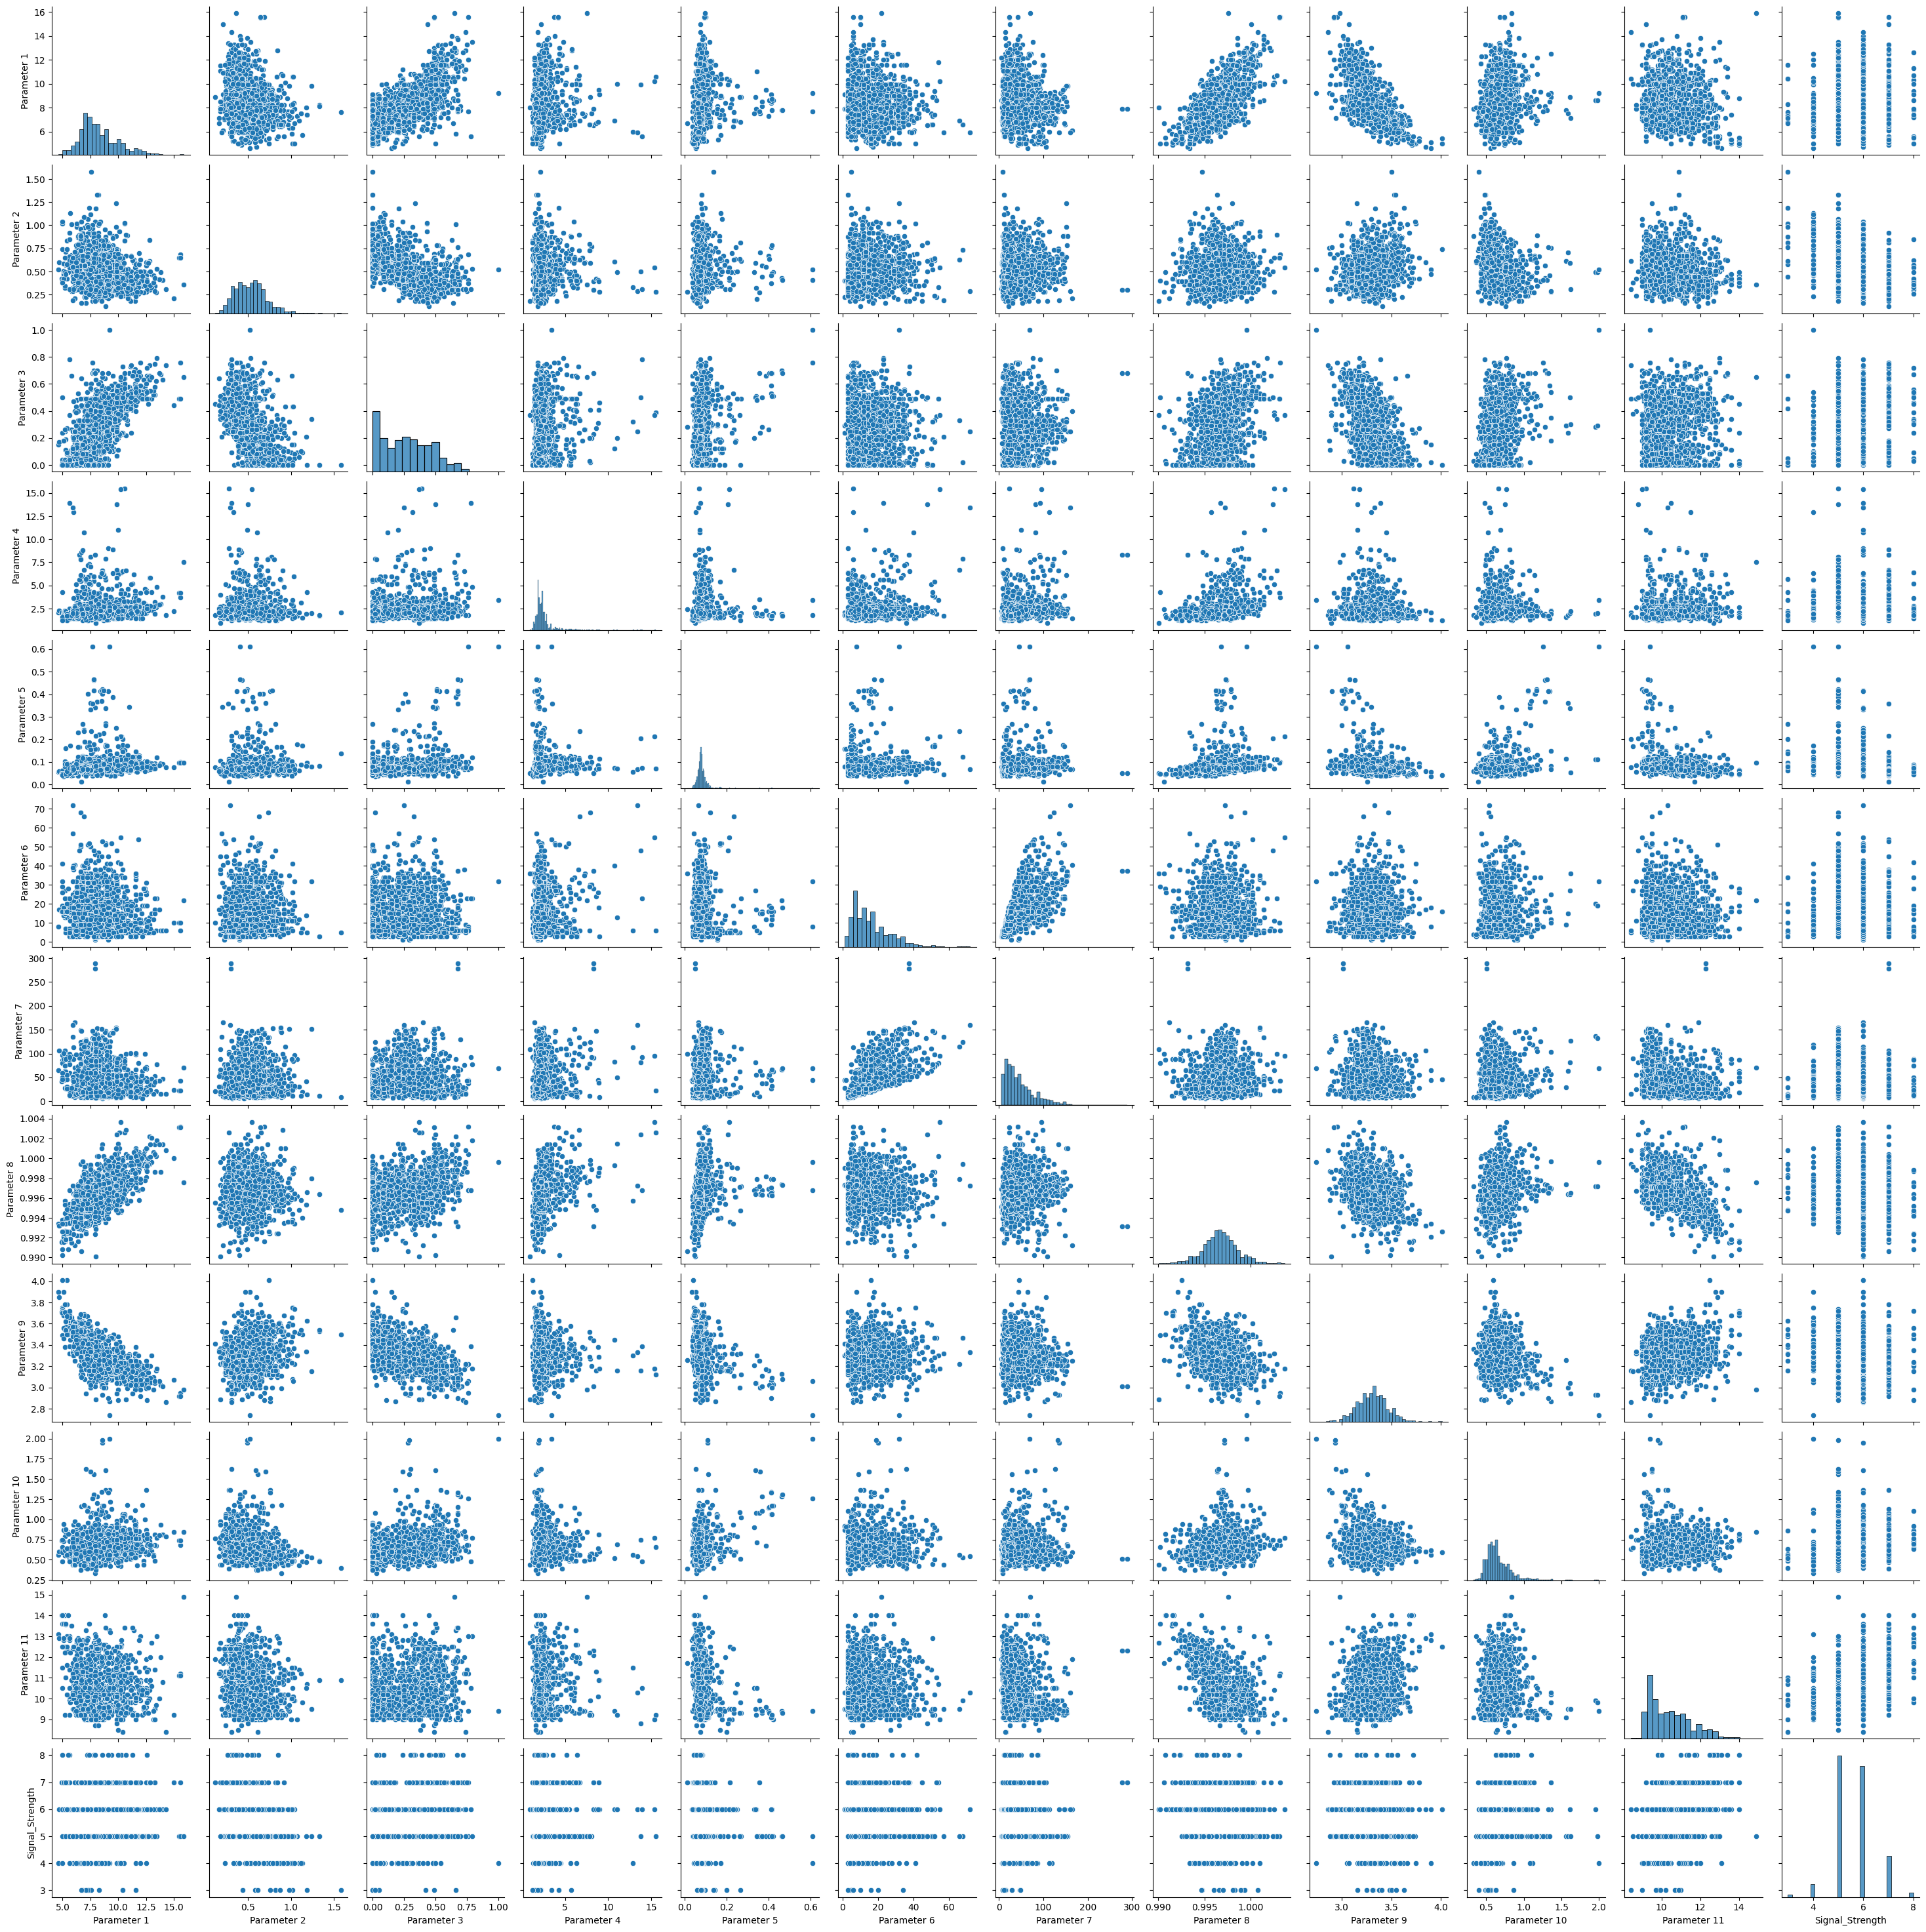

In [15]:
sns.pairplot(df1)


<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1359 non-null   float64
 1   Parameter 2      1359 non-null   float64
 2   Parameter 3      1359 non-null   float64
 3   Parameter 4      1359 non-null   float64
 4   Parameter 5      1359 non-null   float64
 5   Parameter 6      1359 non-null   float64
 6   Parameter 7      1359 non-null   float64
 7   Parameter 8      1359 non-null   float64
 8   Parameter 9      1359 non-null   float64
 9   Parameter 10     1359 non-null   float64
 10  Parameter 11     1359 non-null   float64
 11  Signal_Strength  1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB
None
                  count       mean        std      min      25%      50%  \
Parameter 1      1359.0   8.310596   1.736990  4.60000   7.1000   7.9000   
Parameter 2      1359.0   0.529478   0.18303

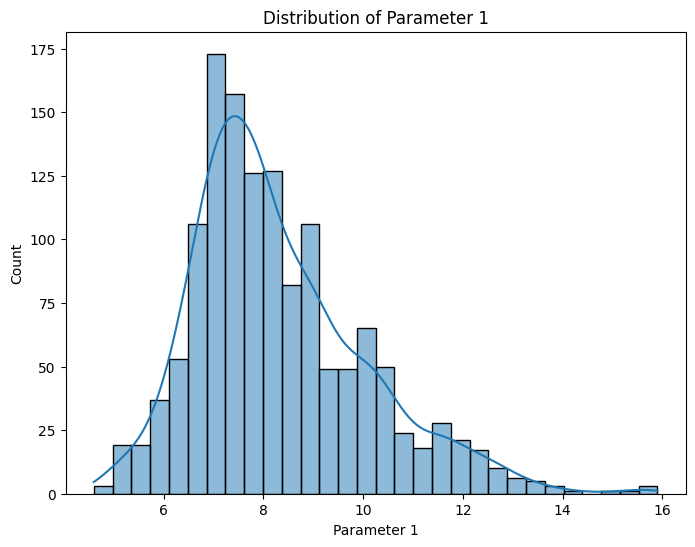

---Analysis of Parameter 2---
Parameter 2
0.500    37
0.580    36
0.400    35
0.600    34
0.430    33
         ..
1.185     1
1.240     1
0.845     1
0.365     1
1.090     1
Name: count, Length: 143, dtype: int64


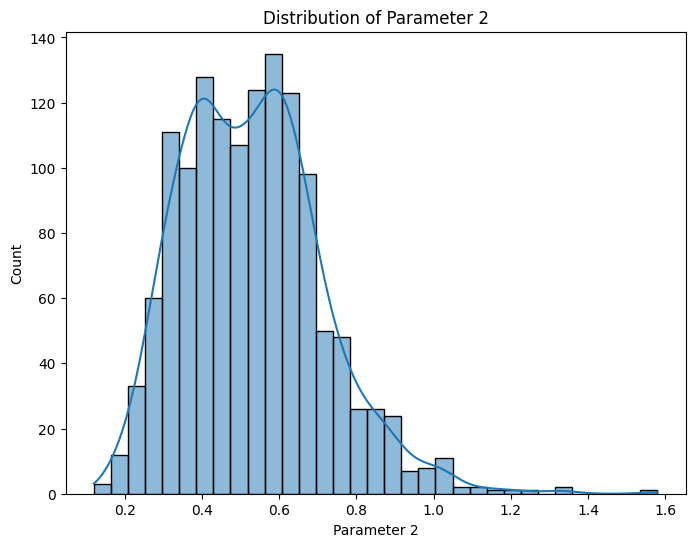

---Analysis of Parameter 3---
Parameter 3
0.00    118
0.49     59
0.24     41
0.02     38
0.08     32
       ... 
0.72      1
0.62      1
0.71      1
0.79      1
0.78      1
Name: count, Length: 80, dtype: int64


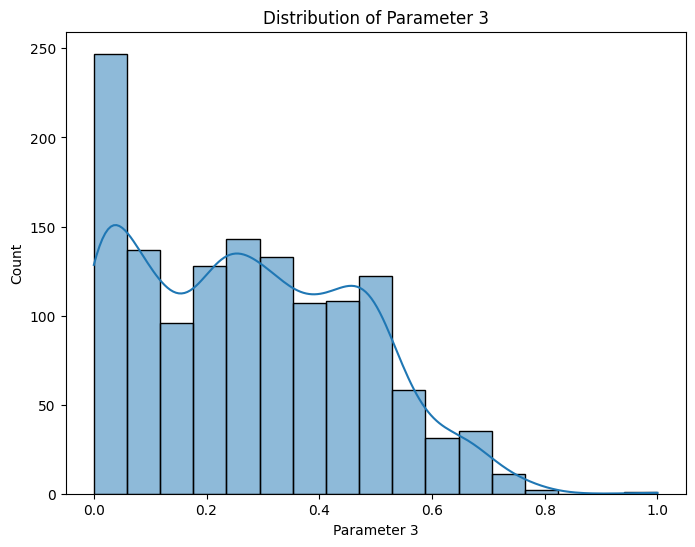

---Analysis of Parameter 4---
Parameter 4
2.00     133
2.20     110
1.80     108
2.10     104
1.90      97
        ... 
2.25       1
2.95       1
2.85       1
3.45       1
13.90      1
Name: count, Length: 91, dtype: int64


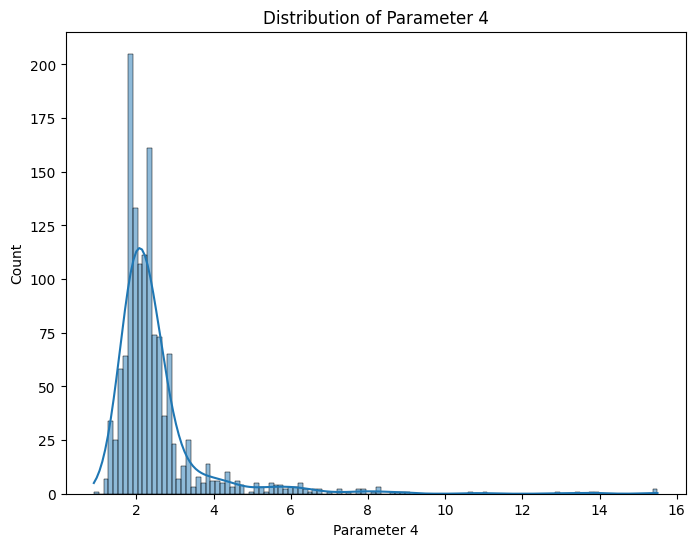

---Analysis of Parameter 5---
Parameter 5
0.080    50
0.078    44
0.074    43
0.084    40
0.076    39
         ..
0.360     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: count, Length: 153, dtype: int64


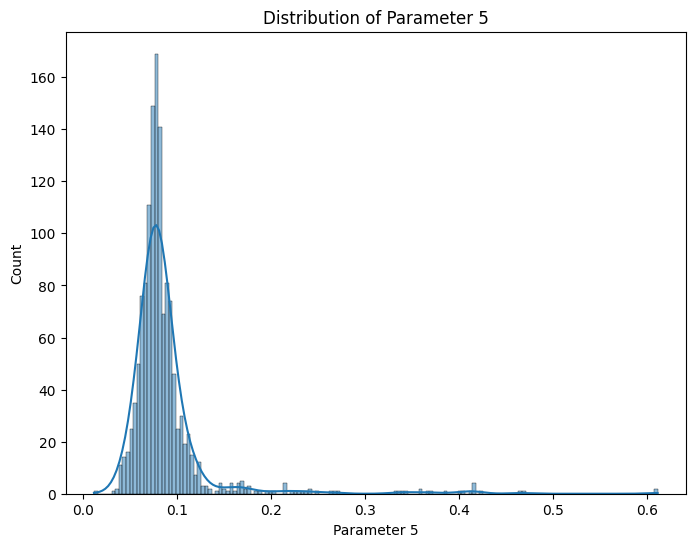

---Analysis of Parameter 6---
Parameter 6
6.0     121
5.0      88
15.0     65
12.0     64
10.0     63
7.0      61
9.0      55
16.0     53
17.0     50
11.0     49
13.0     48
8.0      47
14.0     41
3.0      41
18.0     40
21.0     36
4.0      34
19.0     34
26.0     29
23.0     28
24.0     27
20.0     26
27.0     24
25.0     21
28.0     20
22.0     19
29.0     19
32.0     19
34.0     17
35.0     14
31.0     14
30.0     13
33.0     10
36.0      9
38.0      7
41.0      5
40.0      5
39.0      4
37.0      3
42.0      3
48.0      3
52.0      3
51.0      3
45.0      3
43.0      3
37.5      2
1.0       2
50.0      2
47.0      1
54.0      1
46.0      1
68.0      1
2.0       1
5.5       1
53.0      1
40.5      1
57.0      1
72.0      1
55.0      1
66.0      1
Name: count, dtype: int64


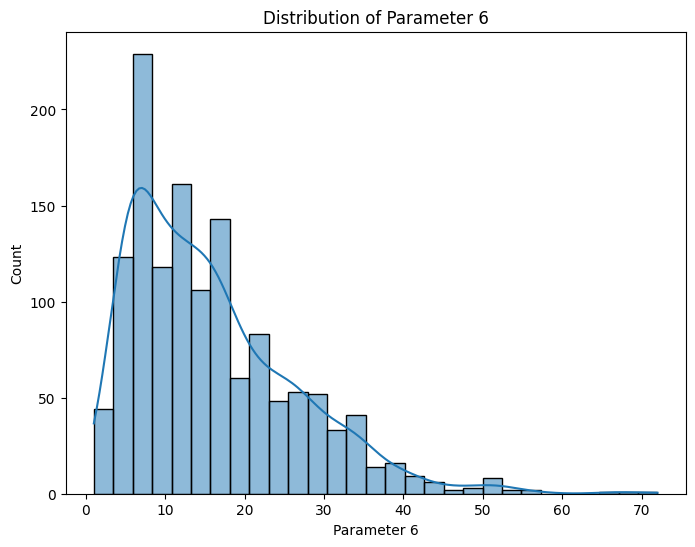

---Analysis of Parameter 7---
Parameter 7
28.0     35
24.0     32
14.0     30
20.0     29
18.0     28
         ..
116.0     1
165.0     1
128.0     1
126.0     1
131.0     1
Name: count, Length: 144, dtype: int64


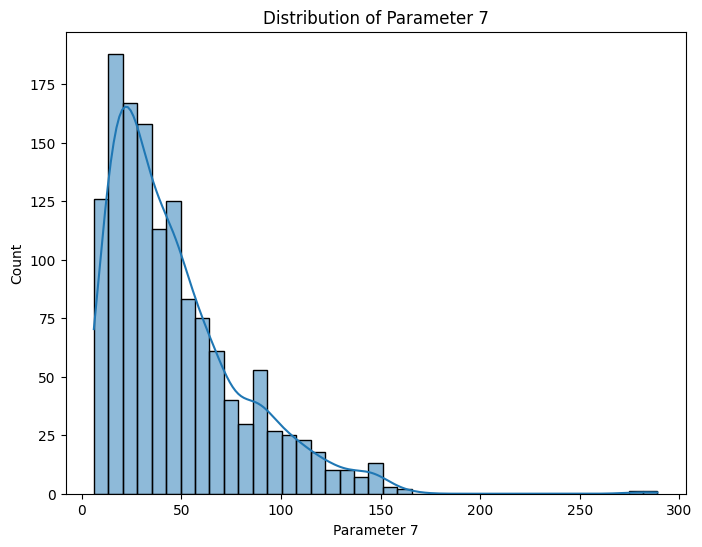

---Analysis of Parameter 8---
Parameter 8
0.99680    33
0.99760    30
0.99720    29
0.99800    28
0.99620    23
           ..
0.99756     1
0.99859     1
0.99426     1
0.99747     1
0.99651     1
Name: count, Length: 436, dtype: int64


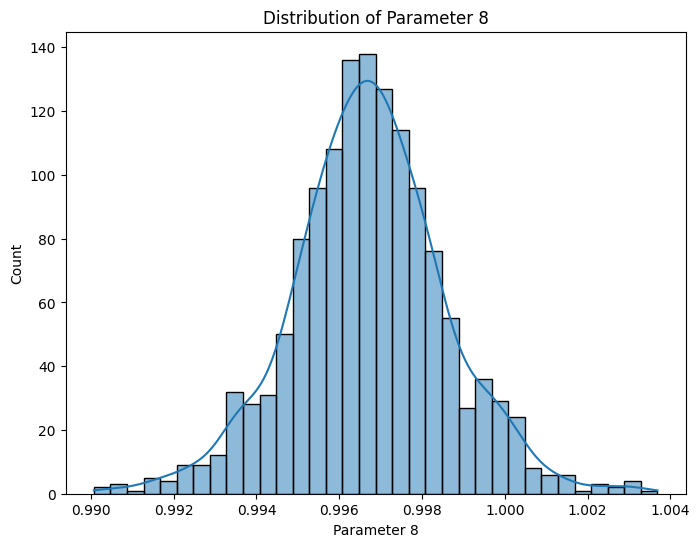

---Analysis of Parameter 9---
Parameter 9
3.30    47
3.26    45
3.36    42
3.38    41
3.32    40
        ..
3.75     1
3.85     1
2.74     1
3.70     1
2.90     1
Name: count, Length: 89, dtype: int64


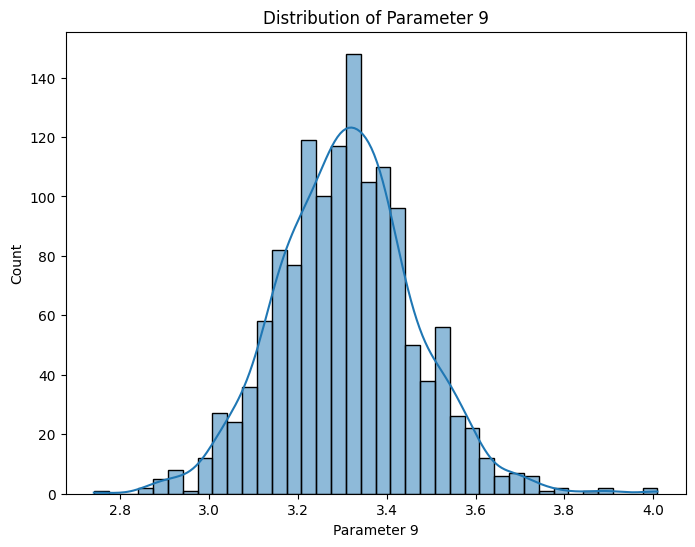

---Analysis of Parameter 10---
Parameter 10
0.54    58
0.58    57
0.60    57
0.62    53
0.56    52
        ..
1.59     1
1.26     1
0.33     1
1.09     1
1.01     1
Name: count, Length: 96, dtype: int64


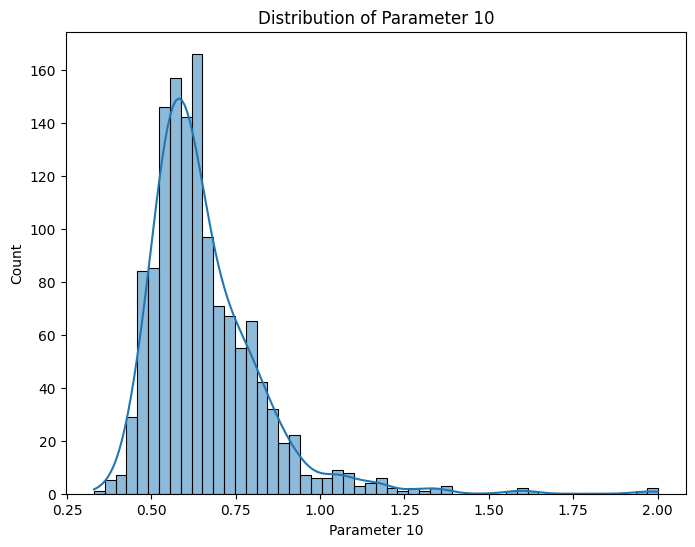

---Analysis of Parameter 11---
Parameter 11
9.500000     111
9.400000      91
9.200000      65
9.800000      63
10.000000     61
            ... 
8.500000       1
10.033333      1
13.500000      1
13.200000      1
10.750000      1
Name: count, Length: 65, dtype: int64


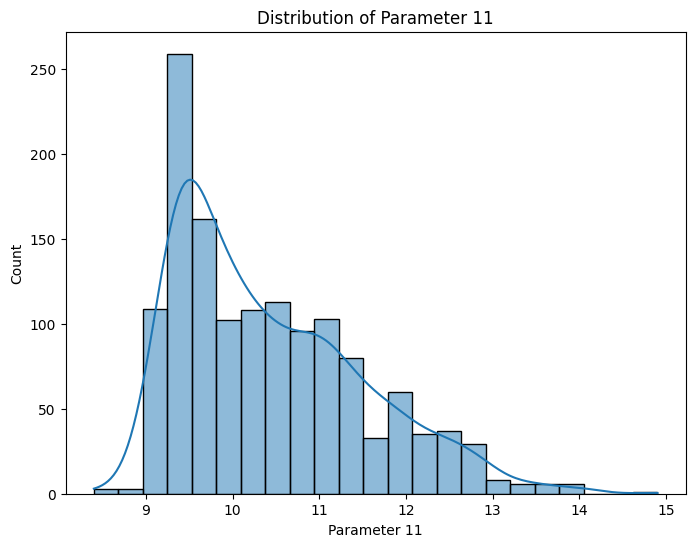

---Analysis of Signal_Strength---
Signal_Strength
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64


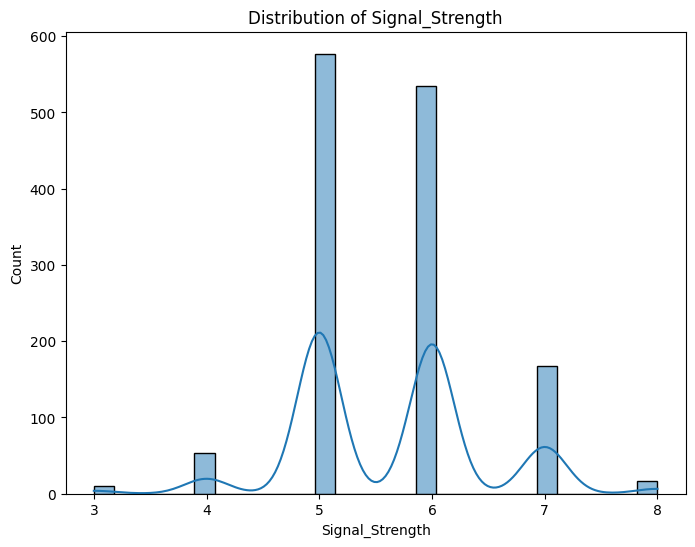

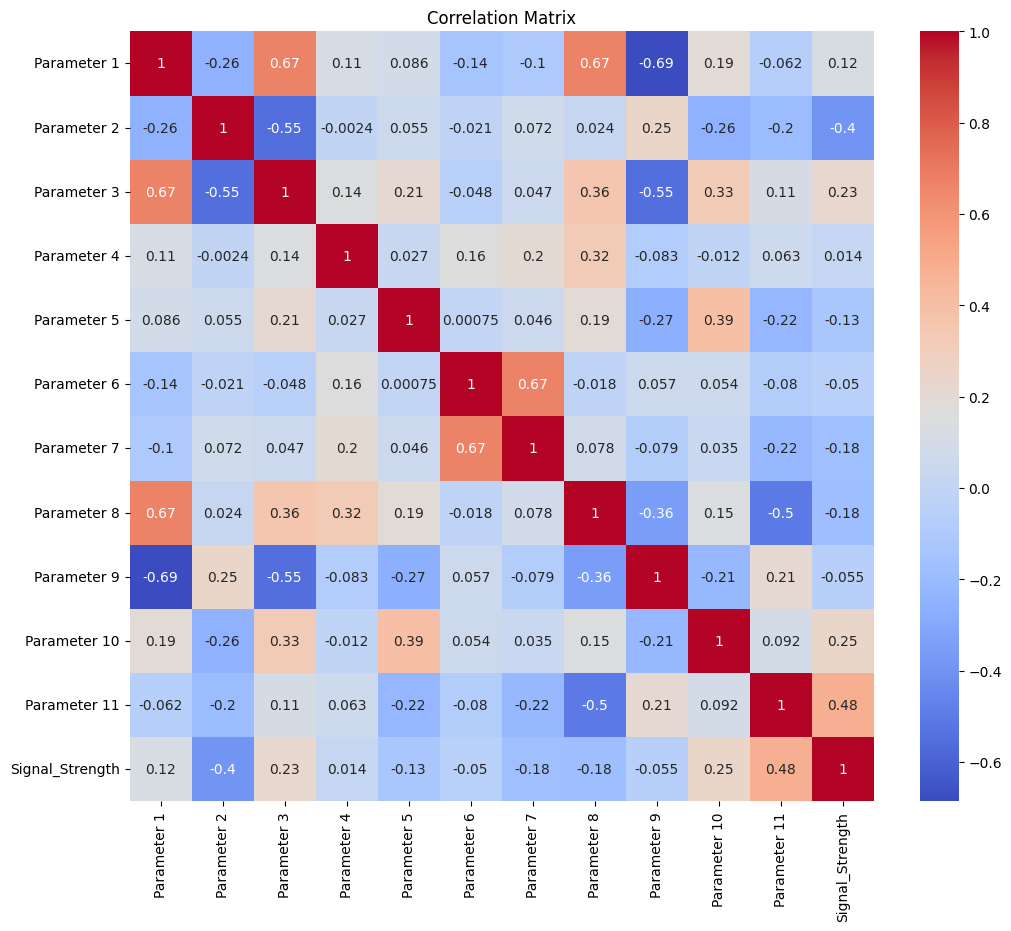

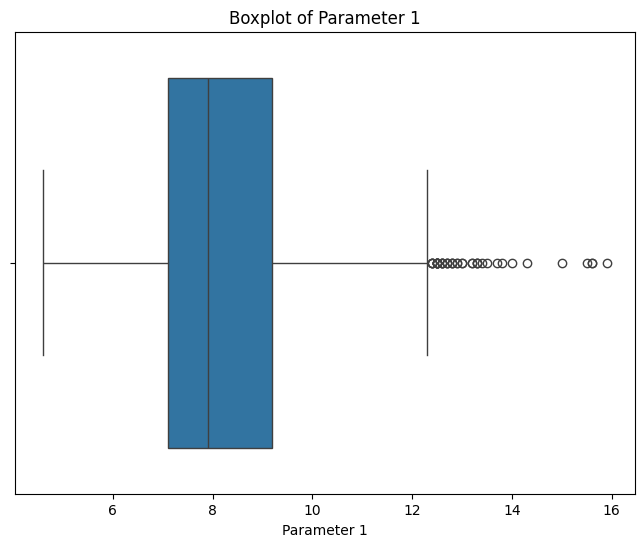

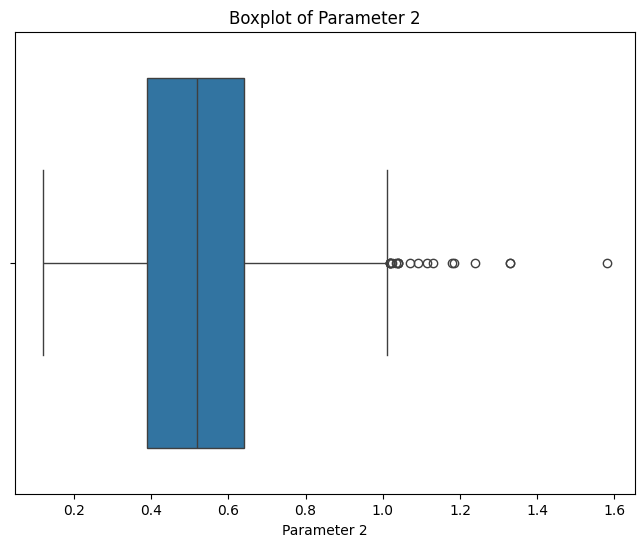

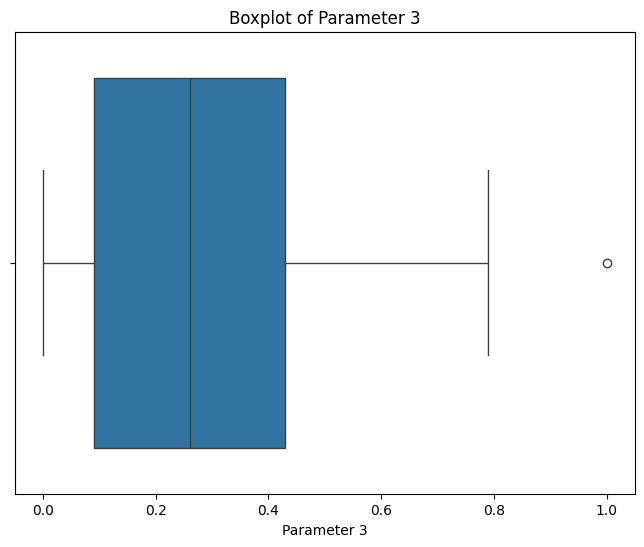

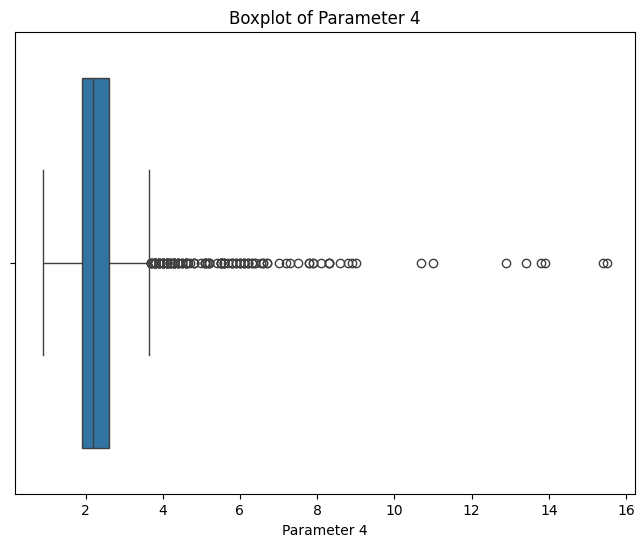

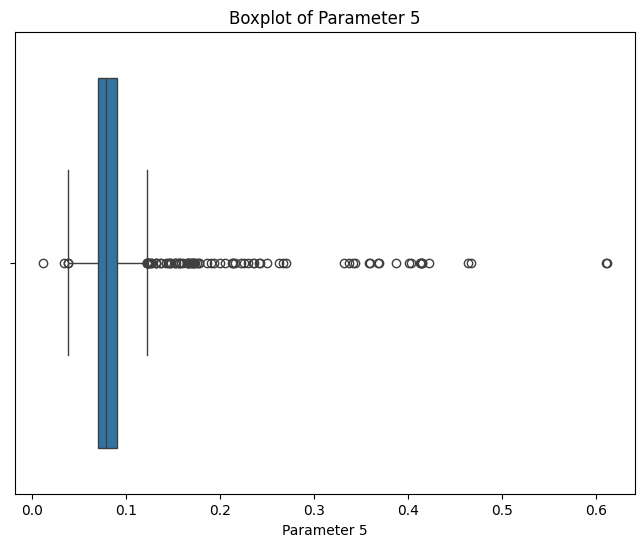

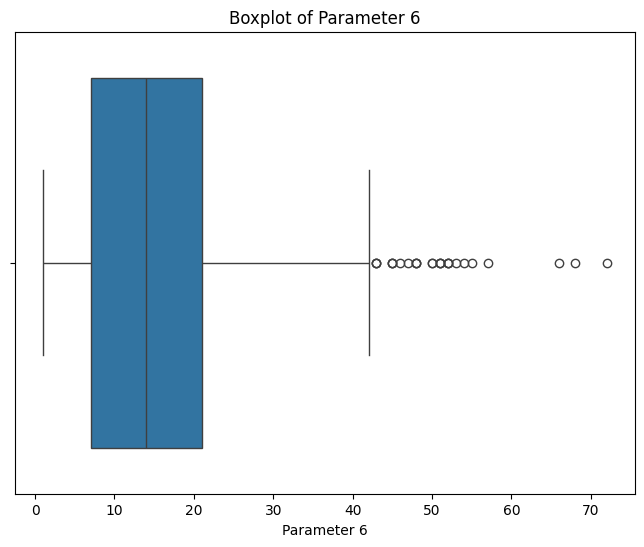

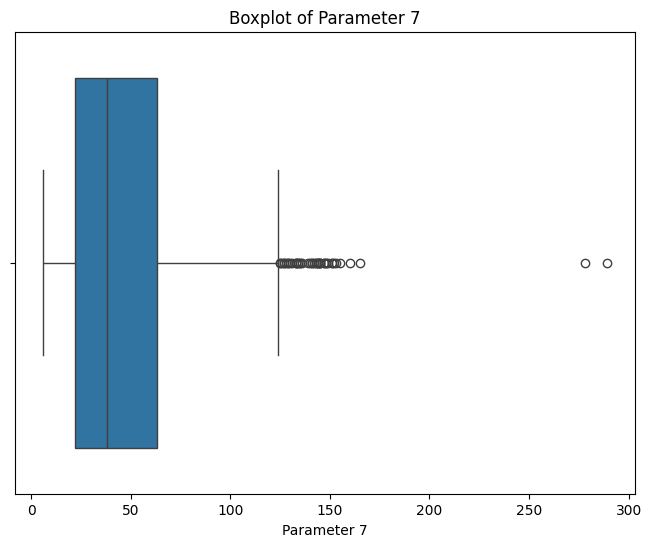

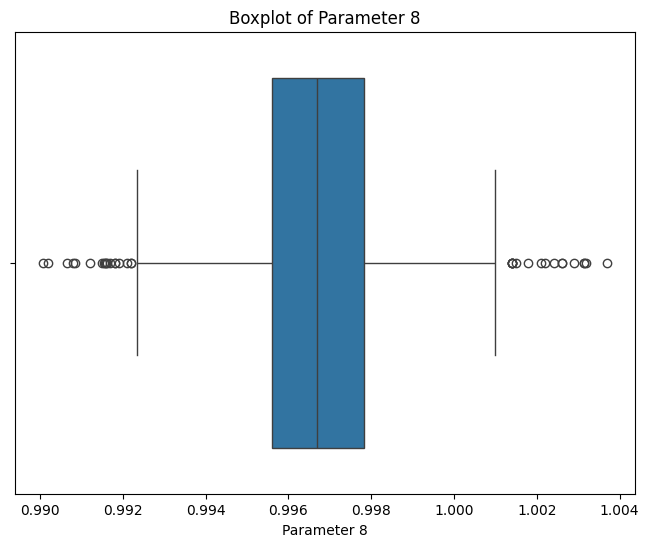

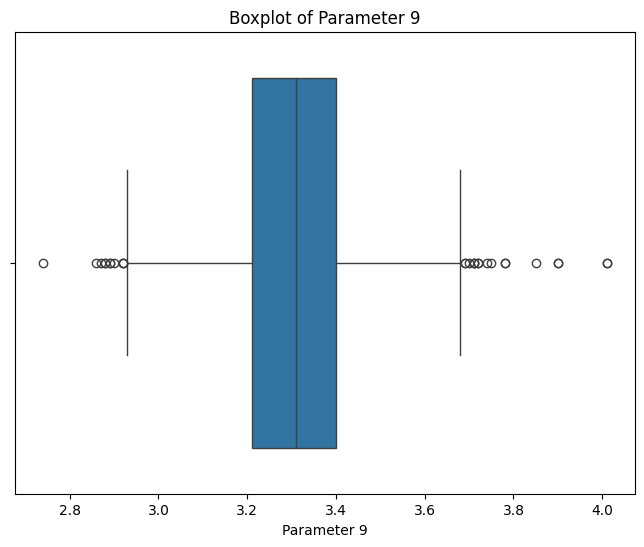

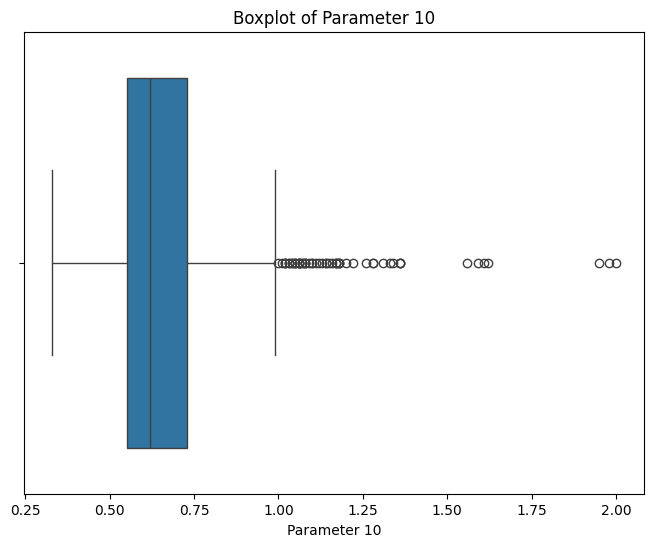

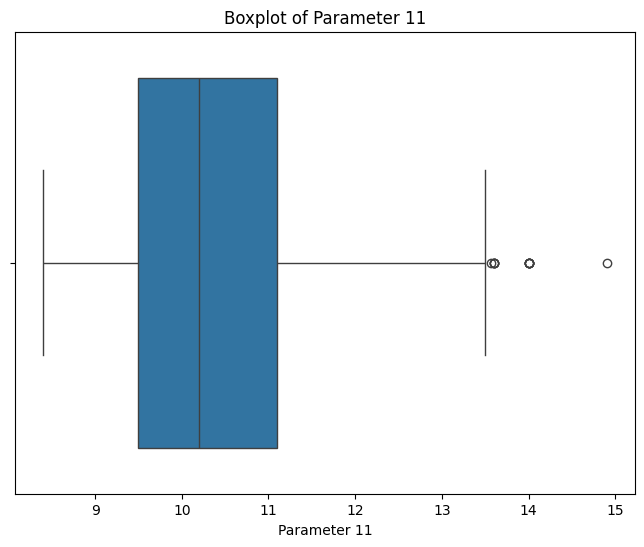

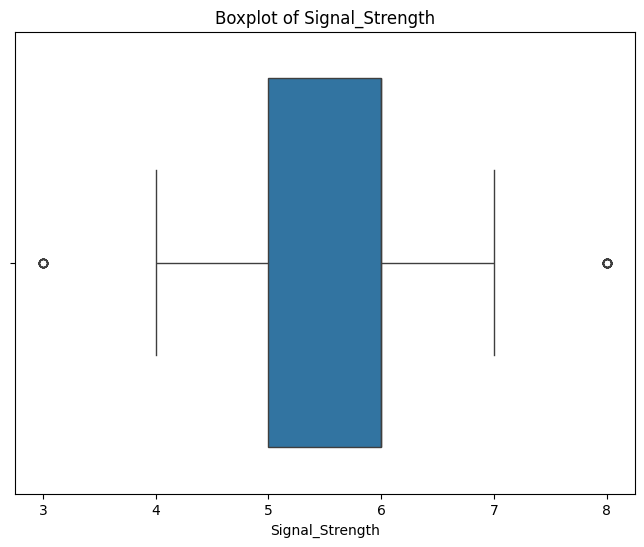

In [16]:
# Check data types and descriptive statistics
print(df1.info())
print(df1.describe().T)

# Explore individual features
for column in df1.columns:
  print(f"---Analysis of {column}---")
  print(df1[column].value_counts())
  if df1[column].dtype != 'object':  # Skip for non-numeric columns
    plt.figure(figsize=(8, 6))
    sns.histplot(df1[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Correlation analysis
plt.figure(figsize=(12, 10))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Boxplots to detect outliers
for column in df1.columns:
  if df1[column].dtype != 'object':
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df1[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# More detailed analysis based on specific columns or relationships might be needed
# For example, scatter plots for numerical features or grouped analysis for categorical ones

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'df1' is your DataFrame and you want to calculate VIF for all numerical columns
numerical_cols = df1.select_dtypes(include=np.number).columns
X = df1[numerical_cols]

# Calculate VIF for each numerical feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data

,feature,VIF
0,Parameter 1,75.023033
1,Parameter 2,17.387181
2,Parameter 3,9.195827
3,Parameter 4,4.915782
4,Parameter 5,6.440176
5,Parameter 6,6.442192
6,Parameter 7,6.601411
7,Parameter 8,1547.276977
8,Parameter 9,1102.707051
9,Parameter 10,22.810607


In [18]:
from sklearn.model_selection import train_test_split
X = df1.drop('Signal_Strength' , axis=1)
y = df1['Signal_Strength']
x_train, x_test, y_train , y_test = train_test_split(X,y, random_state=1, test_size=0.30)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(951, 11)
(408, 11)
(951,)
(408,)


In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [20]:
x_train

array([[-0.5303845 ,  0.77331285, -0.78928573, ...,  0.54682001,
        -0.72312759, -0.86579624],
       [-1.38259614, -0.70505443, -0.73809841, ...,  2.07454948,
         0.09071186,  1.82713749],
       [-1.83710901, -0.30186335, -1.30115883, ...,  3.93439405,
        -0.22230331,  2.19857663],
       ...,
       [-0.70082683, -1.96838647,  0.84870822, ...,  0.28112793,
        -0.72312759,  1.82713749],
       [-0.24631396, -0.94696907,  0.95108284, ...,  0.28112793,
         1.28016953,  2.19857663],
       [-0.5303845 ,  0.12820713, -0.43097455, ...,  1.21105021,
         0.1533149 ,  0.0628016 ]])

In [21]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.BatchNormalization())


model.add(tf.keras.layers.Dense(11,activation='sigmoid'))
model.add(tf.keras.layers.Dense(5,activation='sigmoid'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))


model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test),batch_size=10)
model.summary()

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization                  │ (None, 11)                  │              44 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 244 (980.00 B)

 Trainable params: 220 (880.00 B)

 Non-trainable params: 22 (88.00 B)

 Optimizer params: 2 (12.00 B)

In [26]:
results = model.evaluate(x_test,y_test)
print(results[1])

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 
0.0


In [29]:
# prompt: create python thread to print . for next 10 mins

import time
import threading

def print_dots():
  end_time = time.time() + 600  # 10 minutes from now
  while time.time() < end_time:
    print(".", end="", flush=True)
    time.sleep(1)

# Create and start the thread
dot_thread = threading.Thread(target=print_dots)
dot_thread.start()

.

In [33]:
print(dot_thread.is_alive)

<bound method Thread.is_alive of <Thread(Thread-12 (print_dots), started 135831034566208)>>
